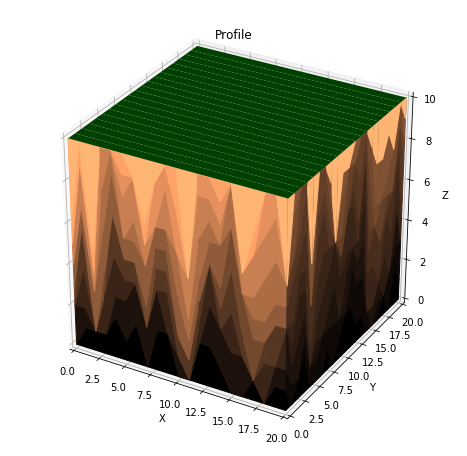

In [86]:
import matplotlib.pylab as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import math
import numpy as np

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

series = 10
samples = 20
max_val = 10

fnx = lambda : np.random.randint(0, 3, (samples * 2) + 1)

rows = []
for i in range(series):
    rows.append(fnx())

z = np.row_stack(rows)   
x = np.arange(samples + 1) 
z_stack = np.cumsum(z, axis=0)
z_stack = np.insert(z_stack, 0, np.zeros((samples * 2) + 1),0)
maxes = np.empty((samples * 2) + 1)
maxes.fill(series)
z_stack = np.insert(z_stack, -1, maxes, 0)
z_stack = np.clip(z_stack,0,max_val)
y0 = np.zeros(samples + 1)

colors = np.linspace(0.0, 1.0, z_stack.shape[0])

color_array = np.empty(z_stack.shape)

for i in range(z_stack.shape[0]):
    color_array[i] = colors[i]

ax.plot_surface(x, y0, z_stack[:,:samples + 1], facecolors=cm.copper(color_array), rstride=1, cstride=1, shade=False)

z2 = np.row_stack(rows) 
y = np.arange(samples + 1) 
z_stack2 = np.cumsum(z2, axis=0)

x10 = np.empty(samples + 1)
x10.fill(samples)

ax.plot_surface(x10, y, z_stack[:,samples:], facecolors=cm.copper(color_array), rstride=1, cstride=1)

x_rows = [np.zeros(samples + 1), np.empty(samples + 1)]
x_rows[1].fill(samples)

x_cap = np.row_stack(x_rows)
y_cap = np.arange(samples + 1) 
z_cap = np.empty(samples + 1)
z_cap.fill(max_val)
ax.plot_surface(x_cap, y_cap, z_cap, color='g')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim([0,samples])
ax.set_ylim([0,samples])
ax.set_zlim([0,series])

ax.set_title('Profile')

plt.show()